<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%204/Compas/Colab%20Notebook/compas_scores_two_years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kolom dengan missing value:
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_desc                29
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_out                 4898
violent_recid              7214
vr_case_number             6395
vr_charge_degree           6395
vr_offense_date            6395
vr_charge_desc             6395
in_custody                  236
out_custody                 236
dtype: int64
Jumlah data setelah preprocessing: 7214 baris
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       823
           1       0.95      1.00      0.97       620

    accuracy         

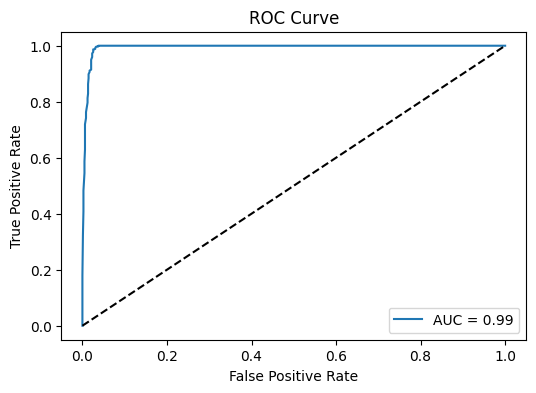

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv"
df = pd.read_csv(url)

# Tampilkan kolom yang memiliki missing value
missing = df.isnull().sum()
print("Kolom dengan missing value:")
print(missing[missing > 0])

# Pilih subset kolom penting (drop yang banyak string/kode unik/tidak dipakai model)
drop_cols = ['id', 'name', 'first', 'last', 'dob', 'c_case_number', 'c_offense_date', 'c_arrest_date',
             'c_jail_in', 'c_jail_out', 'screening_date', 'v_screening_date', 'r_case_number', 'vr_case_number',
             'r_offense_date', 'vr_offense_date', 'r_jail_in', 'r_jail_out', 'start', 'end',
             'r_charge_desc', 'vr_charge_desc', 'c_charge_desc', 'type_of_assessment',
             'v_type_of_assessment', 'r_charge_degree', 'vr_charge_degree', 'v_score_text',
             'score_text']

df = df.drop(columns=drop_cols)

# Drop baris yang label-nya (target) kosong
df = df.dropna(subset=['two_year_recid'])

# Ubah target jadi y
y = df['two_year_recid']
X = df.drop(columns=['two_year_recid'])

# Encode kolom kategorikal
cat_cols = X.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = X[col].astype(str)
    X[col] = le.fit_transform(X[col])

# Ganti missing numerik dengan median
X = X.fillna(X.median(numeric_only=True))

# Cek apakah X masih kosong
print(f"Jumlah data setelah preprocessing: {X.shape[0]} baris")

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


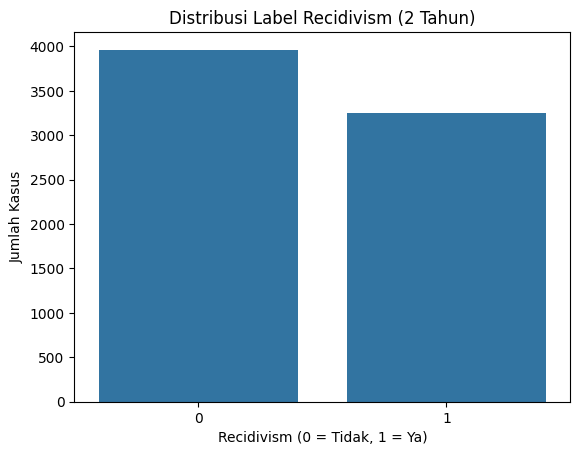

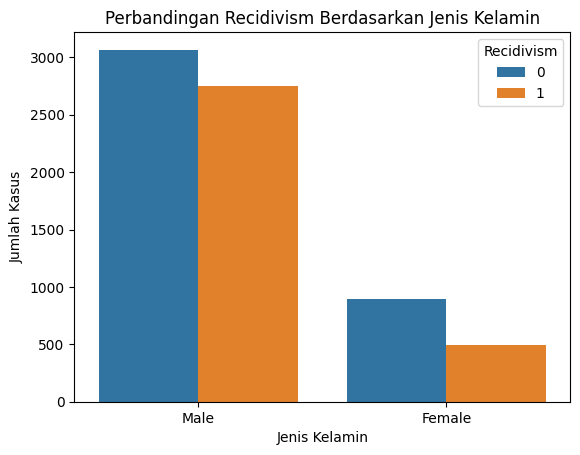

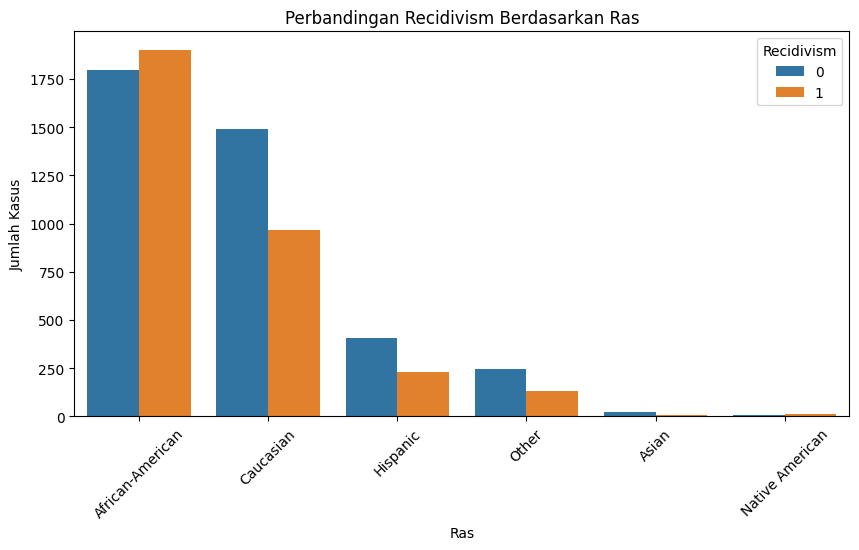

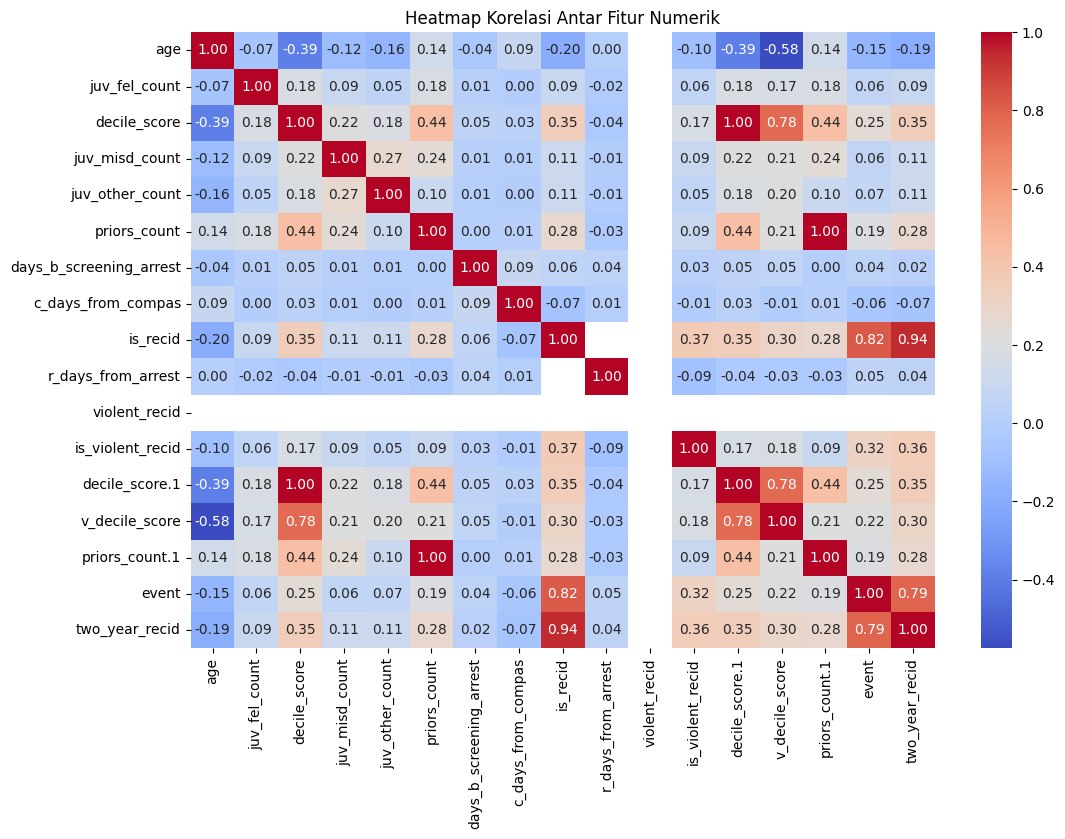

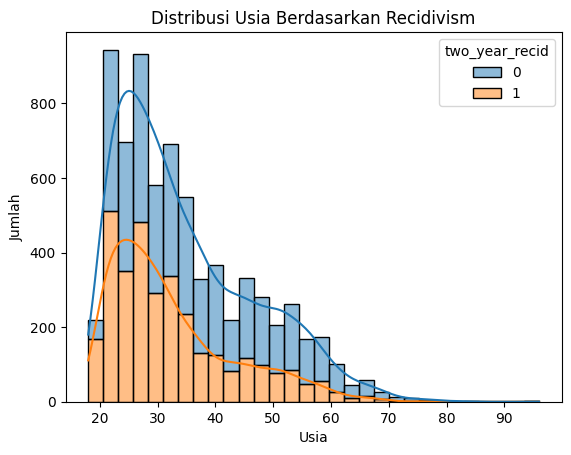

In [16]:
#1. Distribusi Target (two_year_recid)

sns.countplot(data=df, x='two_year_recid')
plt.title("Distribusi Label Recidivism (2 Tahun)")
plt.xlabel("Recidivism (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Kasus")
plt.show()

#Perbandingan Recidivism berdasarkan Jenis Kelamin
sns.countplot(data=df, x='sex', hue='two_year_recid')
plt.title("Perbandingan Recidivism Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Kasus")
plt.legend(title="Recidivism")
plt.show()
#Perbandingan Recidivism berdasarkan Ras
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='race', hue='two_year_recid', order=df['race'].value_counts().index)
plt.title("Perbandingan Recidivism Berdasarkan Ras")
plt.xlabel("Ras")
plt.ylabel("Jumlah Kasus")
plt.legend(title="Recidivism")
plt.xticks(rotation=45)
plt.show()

# Korelasi antar Fitur Numerik. Ambil fitur numerik saja
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()
#Distribusi Usia Berdasarkan Recidivism
sns.histplot(data=df, x='age', hue='two_year_recid', bins=30, kde=True, multiple='stack')
plt.title("Distribusi Usia Berdasarkan Recidivism")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()
